In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA


%matplotlib inline
sns.set()

pd.options.display.max_columns = 100
pd.options.display.precision = 2

In [10]:
X, y = datasets.make_moons(noise=0.1)

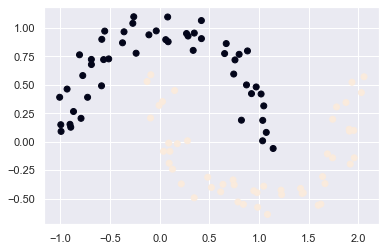

In [11]:
plt.scatter(X[: ,0], X[: ,1], c=y)

## KNN : K-Nearest Neighbours

In [15]:
cancer = datasets.load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [17]:
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.12,0.28,0.30,0.15,0.24,0.08,1.09,0.91,8.59,153.40,6.40e-03,0.05,0.05,0.02,0.03,6.19e-03,25.38,17.33,184.60,2019.0,0.16,0.67,0.71,0.27,0.46,0.12
1,20.57,17.77,132.90,1326.0,0.08,0.08,0.09,0.07,0.18,0.06,0.54,0.73,3.40,74.08,5.22e-03,0.01,0.02,0.01,0.01,3.53e-03,24.99,23.41,158.80,1956.0,0.12,0.19,0.24,0.19,0.28,0.09
2,19.69,21.25,130.00,1203.0,0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.58,94.03,6.15e-03,0.04,0.04,0.02,0.02,4.57e-03,23.57,25.53,152.50,1709.0,0.14,0.42,0.45,0.24,0.36,0.09
3,11.42,20.38,77.58,386.1,0.14,0.28,0.24,0.11,0.26,0.10,0.50,1.16,3.44,27.23,9.11e-03,0.07,0.06,0.02,0.06,9.21e-03,14.91,26.50,98.87,567.7,0.21,0.87,0.69,0.26,0.66,0.17
4,20.29,14.34,135.10,1297.0,0.10,0.13,0.20,0.10,0.18,0.06,0.76,0.78,5.44,94.44,1.15e-02,0.02,0.06,0.02,0.02,5.11e-03,22.54,16.67,152.20,1575.0,0.14,0.20,0.40,0.16,0.24,0.08


In [19]:
y = cancer.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [22]:
X.describe().T       # shows a scaling issue

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,1.41e+01,3.52e+00,6.98e+00,1.17e+01,1.34e+01,1.58e+01,28.11
mean texture,569.0,1.93e+01,4.30e+00,9.71e+00,1.62e+01,1.88e+01,2.18e+01,39.28
mean perimeter,569.0,9.20e+01,2.43e+01,4.38e+01,7.52e+01,8.62e+01,1.04e+02,188.50
mean area,569.0,6.55e+02,3.52e+02,1.44e+02,4.20e+02,5.51e+02,7.83e+02,2501.00
mean smoothness,569.0,9.64e-02,1.41e-02,5.26e-02,8.64e-02,9.59e-02,1.05e-01,0.16
mean compactness,569.0,1.04e-01,5.28e-02,1.94e-02,6.49e-02,9.26e-02,1.30e-01,0.35
mean concavity,569.0,8.88e-02,7.97e-02,0.00e+00,2.96e-02,6.15e-02,1.31e-01,0.43
mean concave points,569.0,4.89e-02,3.88e-02,0.00e+00,2.03e-02,3.35e-02,7.40e-02,0.20
mean symmetry,569.0,1.81e-01,2.74e-02,1.06e-01,1.62e-01,1.79e-01,1.96e-01,0.30
mean fractal dimension,569.0,6.28e-02,7.06e-03,5.00e-02,5.77e-02,6.15e-02,6.61e-02,0.10


### Scaling issues

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
149,13.74,17.91,88.12,585.0,0.08,0.06,0.03,0.01,0.15,0.06,0.25,0.76,1.57,21.47,2.84e-03,0.02,0.02,5.83e-03,0.01,1.98e-03,15.34,22.46,97.19,725.9,0.10,0.18,0.16,0.06,0.23,0.07
124,13.37,16.39,86.10,553.5,0.07,0.07,0.08,0.03,0.14,0.06,0.16,1.14,1.22,14.66,5.92e-03,0.03,0.05,1.04e-02,0.01,4.08e-03,14.26,22.75,91.99,632.1,0.10,0.25,0.33,0.09,0.20,0.08
421,14.69,13.98,98.22,656.1,0.10,0.18,0.14,0.06,0.21,0.07,0.55,1.51,4.79,49.45,9.98e-03,0.05,0.05,1.58e-02,0.03,5.44e-03,16.46,18.34,114.10,809.2,0.13,0.36,0.32,0.11,0.28,0.09
195,12.91,16.33,82.53,516.4,0.08,0.05,0.04,0.02,0.18,0.06,0.19,0.91,1.49,15.75,5.30e-03,0.02,0.02,8.42e-03,0.02,2.15e-03,13.88,22.00,90.81,600.6,0.11,0.15,0.18,0.08,0.30,0.07
545,13.62,23.23,87.19,573.2,0.09,0.07,0.03,0.02,0.17,0.06,0.35,1.34,2.07,31.24,5.87e-03,0.02,0.02,9.06e-03,0.02,2.58e-03,15.35,29.09,97.58,729.8,0.12,0.15,0.10,0.07,0.26,0.07


In [28]:
X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
204,12.47,18.60,81.09,481.9,0.10,0.11,0.08,0.04,0.19,0.06,0.40,1.04,2.50,30.29,6.95e-03,0.02,0.03,0.01,0.02,3.59e-03,14.97,24.64,96.05,677.9,0.14,0.24,0.27,0.10,0.30,0.09
70,18.94,21.31,123.60,1130.0,0.09,0.10,0.11,0.08,0.16,0.05,0.79,0.80,5.49,96.05,4.44e-03,0.02,0.02,0.01,0.01,1.70e-03,24.86,26.58,165.90,1866.0,0.12,0.23,0.27,0.18,0.26,0.07
131,15.46,19.48,101.70,748.9,0.11,0.12,0.15,0.08,0.19,0.06,0.47,0.79,3.09,48.31,6.24e-03,0.01,0.03,0.01,0.01,2.46e-03,19.26,26.00,124.90,1156.0,0.15,0.24,0.38,0.15,0.28,0.08
431,12.40,17.68,81.47,467.8,0.11,0.13,0.08,0.03,0.18,0.07,0.18,1.46,2.20,15.43,1.00e-02,0.03,0.05,0.01,0.02,6.00e-03,12.88,22.91,89.61,515.8,0.14,0.26,0.24,0.07,0.26,0.09
540,11.54,14.44,74.65,402.9,0.10,0.11,0.07,0.03,0.18,0.07,0.28,1.77,1.63,20.86,1.21e-02,0.04,0.06,0.01,0.02,5.51e-03,12.26,19.68,78.78,457.8,0.13,0.21,0.18,0.07,0.23,0.08


In [29]:
# scaling
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [31]:
X_train_scaled = scaler.transform(X_train)

In [35]:
X_test_scaled = scaler.transform(X_test)

## Modeling (KNN)

In [33]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [36]:
y_pred = knn.predict(X_test_scaled)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

## Evaluation

In [38]:
confusion_matrix(y_test, y_pred)

array([[ 59,   4],
       [  3, 105]])

## PCA

In [50]:
pca = PCA()
pca.fit(X_train_scaled)
pca.explained_variance_ratio_.round(2)

array([0.43, 0.2 , 0.1 , 0.07, 0.05, 0.04, 0.02, 0.02, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

### Interpretation
We consider 0.85 of explained variance ration as sufficient

In [51]:
X_trained_scaled_pca = pca.transform(X_train_scaled)

In [52]:
# Just see that the correlation is corrected
pd.DataFrame(X_trained_scaled_pca).corr().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,1.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0
1,-0.0,1.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0
2,0.0,0.0,1.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0
3,-0.0,-0.0,0.0,1.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0
4,-0.0,0.0,-0.0,-0.0,1.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
5,0.0,0.0,-0.0,-0.0,0.0,1.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,-0.0,0.0,1.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0
7,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,1.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0
8,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,1.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0
9,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,1.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0


In [54]:
pca = PCA(0.85)
pca.fit(X_train_scaled)
pca.explained_variance_ratio_.sum()

0.8868897569511309

In [55]:
X_trained_scaled_pca = pca.transform(X_train_scaled)
X_trained_scaled_pca.shape

(398, 6)

## Modeling again

In [56]:
knn = KNeighborsClassifier()
knn.fit(X_trained_scaled_pca, y_train)

KNeighborsClassifier()

In [57]:
X_test_scaled_pca = pca.transform(X_test_scaled)

In [58]:
y_pred_pca = knn.predict(X_test_scaled_pca)
confusion_matrix(y_test, y_pred_pca)

array([[ 59,   4],
       [  3, 105]])